In [14]:
from statsbombpy import sb
import pandas as pd
import warnings; warnings.simplefilter('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
euro_matches = sb.matches(competition_id=55, season_id=282)
matches = euro_matches["match_id"]

In [4]:
df_list = []
for i in matches:
    df = sb.events(i)
    df_list.append(df)

events = pd.concat(df_list, ignore_index=True)

In [5]:
passes = events[events["type"] == "Pass"]
passes = passes[[ "pass_length", "pass_angle","pass_height"]]
passes = passes.reset_index(drop=True)
passes

,pass_length,pass_angle,pass_height
0,34.738163,-2.982596,Ground Pass
1,65.695740,0.462286,High Pass
2,30.236732,0.340577,High Pass
3,25.678005,0.316825,High Pass
4,15.160475,2.601173,Ground Pass
...,...,...,...
53885,27.655200,-0.808412,Ground Pass
53886,17.042593,3.012143,Ground Pass
53887,15.110923,1.804540,Ground Pass
53888,12.553884,0.392340,Ground Pass


In [6]:
passes

,pass_length,pass_angle,pass_height
0,34.738163,-2.982596,Ground Pass
1,65.695740,0.462286,High Pass
2,30.236732,0.340577,High Pass
3,25.678005,0.316825,High Pass
4,15.160475,2.601173,Ground Pass
...,...,...,...
53885,27.655200,-0.808412,Ground Pass
53886,17.042593,3.012143,Ground Pass
53887,15.110923,1.804540,Ground Pass
53888,12.553884,0.392340,Ground Pass


<Axes: xlabel='pass_angle', ylabel='pass_length'>

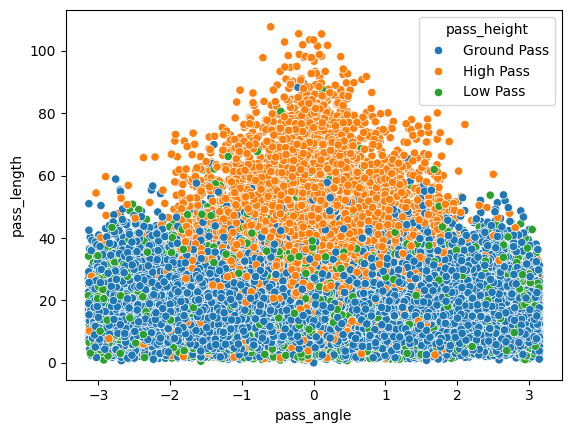

In [7]:
sns.scatterplot(data=passes, x="pass_angle", y="pass_length", hue="pass_height")

In [8]:
X = passes[["pass_length", "pass_angle"]]
y = passes[["pass_height"]] 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
knn = KNeighborsClassifier(n_neighbors=3)

In [12]:
knn.fit(X_train, y_train) # type: ignore

KNeighborsClassifier(n_neighbors=3)

In [17]:
knn.score(X_test, y_test) # type: ignore

0.8394878456114306

In [21]:
predicted = knn.predict(X) # type: ignore

In [22]:
passes["predicted"] = predicted.tolist()

<Axes: xlabel='pass_angle', ylabel='pass_length'>

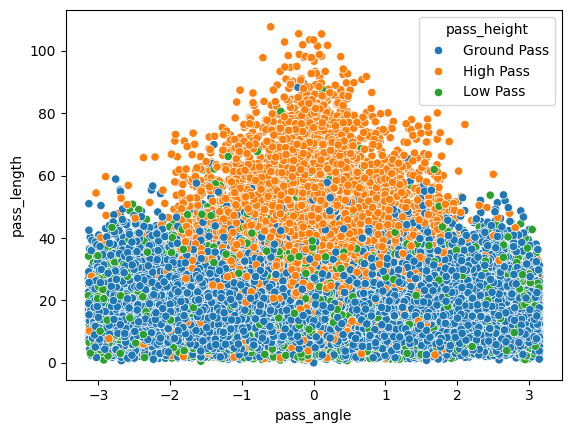

In [24]:
sns.scatterplot(data=passes, x="pass_angle", y="pass_length", hue="pass_height")

<Axes: xlabel='pass_angle', ylabel='pass_length'>

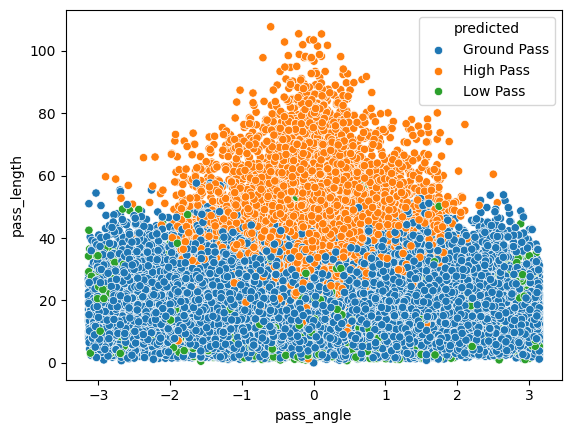

In [23]:
sns.scatterplot(data=passes, x="pass_angle", y="pass_length", hue="predicted")

In [27]:
correct_labels = sum(passes["pass_height"] == passes["predicted"])
accuracy = (correct_labels/len(passes["pass_height"])) * 100

In [28]:
accuracy

84.45537205418445